## [Ref Link](https://youtu.be/vxdVKbAv6as)

### Chi-Square (Categorical Attributes)


In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/aswintechguy/Data-Science-Concepts/main/Machine%20Learning/data/Loan%20Prediction%20Dataset.csv")

In [13]:
# fill null values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
# label encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,73,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
from sklearn.feature_selection import chi2
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [16]:
chi_scores = chi2(X, y)

In [18]:
chi_scores

(array([8.72362729e+00, 3.62343084e-02, 1.78242499e+00, 8.59527587e-02,
        3.54050246e+00, 7.28480330e-03, 4.98393204e-01, 4.06861177e+00,
        2.43745841e+01, 3.17201503e-03, 2.60058772e+01, 3.77837464e-01]),
 array([3.14112478e-03, 8.49032435e-01, 1.81851834e-01, 7.69386856e-01,
        5.98873168e-02, 9.31982300e-01, 4.80206986e-01, 4.36871644e-02,
        7.93081430e-07, 9.55086373e-01, 3.40379591e-07, 5.38762867e-01]))

<AxesSubplot:>

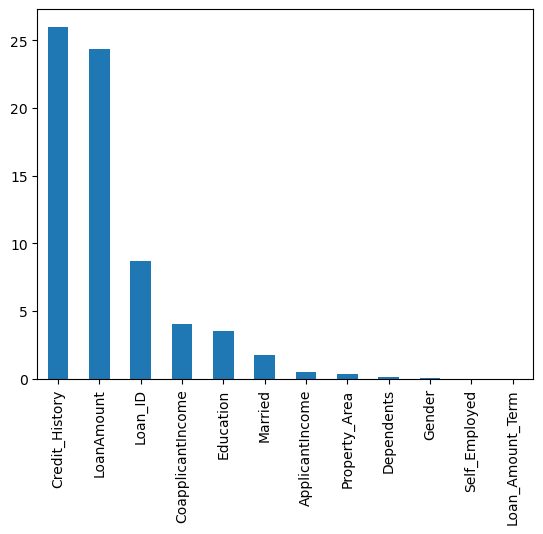

In [19]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<AxesSubplot:>

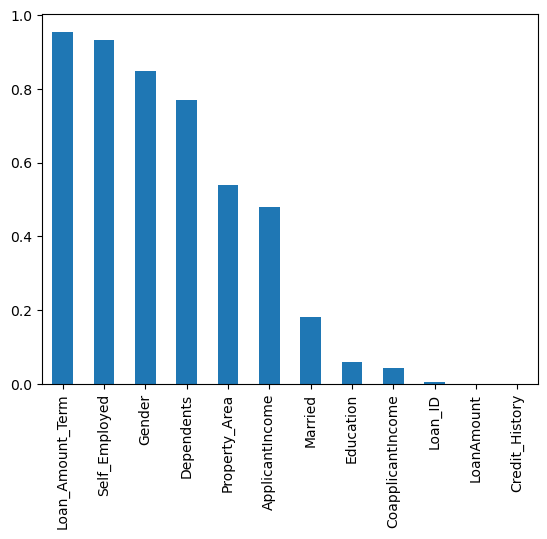

In [20]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

### Recursive Feature Elimination (RFE)

In [21]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [22]:
# input split
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status'] 

In [23]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [24]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Loan_ID selected=True rank=1
Gender selected=False rank=9
Married selected=False rank=7
Dependents selected=False rank=5
Education selected=False rank=8
Self_Employed selected=False rank=10
ApplicantIncome selected=True rank=1
CoapplicantIncome selected=False rank=2
LoanAmount selected=False rank=3
Loan_Amount_Term selected=False rank=4
Credit_History selected=True rank=1
Property_Area selected=False rank=6
